<a href="https://colab.research.google.com/github/ihyaulumuddin044/Pengantar_ML/blob/main/modules/simple_linier_regression/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#simple linier regression

In [14]:
data_nilai = pd.read_csv('simple_linier_regression.csv')
print("data lama belajar dan nila siswa:\n",data_nilai)

X = data_nilai['Jam']
y = data_nilai['Nilai']

X,y = np.array(X), np.array(y)
print('='*40)
print("data nilai setelah di jadikan ke numpy array",X)
print("data nilai setelah di jadikan ke numpy array",y)

data lama belajar dan nila siswa:
    Jam  Nilai
0    1     60
1    2     67
2    3     77
3    4     80
4    5     97
data nilai setelah di jadikan ke numpy array [1 2 3 4 5]
data nilai setelah di jadikan ke numpy array [60 67 77 80 97]


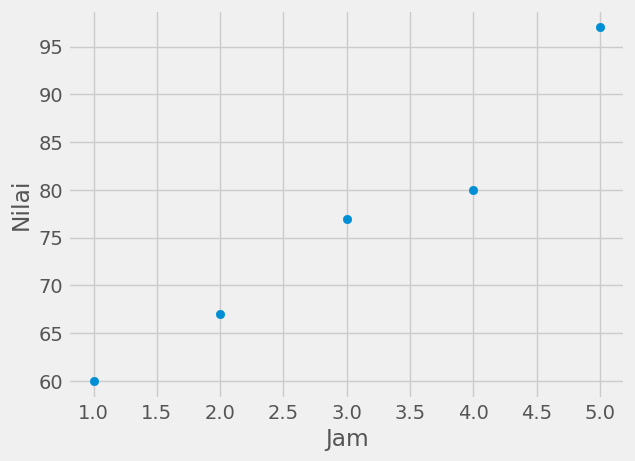

In [24]:
# plot data
plt.scatter(X,y)
plt.xlabel('Jam')
plt.ylabel('Nilai')
plt.show()

In [25]:
# prediksi nilai berdasarkan lama belajar
from sklearn.linear_model import LinearRegression
linier = LinearRegression()
linier.fit(X.reshape(-1,1),y)

LinearRegression()

In [30]:
print("nilai koefisien:", linier.coef_)
print("nilai intercept:", linier.intercept_)

# nilai koefisien: [8.7]
# nilai intercept: 50.10000000000001

nilai koefisien: [8.7]
nilai intercept: 50.10000000000001


In [26]:
# evaluasi model dengan R2
r_squered = linier.score(X.reshape(-1,1),y)
print("nilai r2:", r_squered)

# nilai r2: 0.95231504781077

nilai r2: 0.95231504781077


In [28]:
# test model dengan data baru
lama_belajar = np.array([3.5]) # masukkan lama belajar, kita di sini menggunkan 3.5 jam
prediksi = linier.predict(lama_belajar.reshape(-1,1))
print("prediksi nilai:", prediksi)

# prediksi nilai: [80.55]

prediksi nilai: [80.55]


# multiple linear regression

In [ ]:
data_harga_rumah = pd.DataFrame({
    "luas":[50,60,70,80,90],
    "kamar":[3,4,3,3,2],
    "harga":[100,150,180,320,500]
    })

data_harga_rumah

,luas,kamar,harga
0,50,3,100
1,60,4,150
2,70,3,180
3,80,3,320
4,90,2,500


In [ ]:
X = data_harga_rumah.drop("harga", axis=1)
y = data_harga_rumah["harga"]

X,y = np.array(X), np.array(y)
from sklearn.linear_model import LinearRegression
linier = LinearRegression()
linier.fit(X,y)

LinearRegression()

In [ ]:
r_squered = linier.score(X,y)
print("R2 score:", r_squered)

r2: 0.928001387925052


In [ ]:
prediksi = linier.predict([[55,3]])
print("prediksi:", prediksi)

prediksi: [128.63636364]


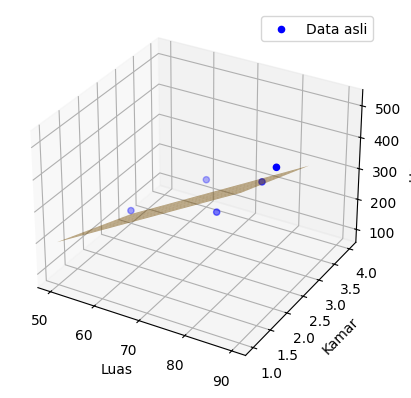

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data asli
ax.scatter(X[:,0], X[:,1], y, color='blue', label='Data asli')

# Buat grid prediksi
x1_range = np.linspace(50, 90, 10)
x2_range = np.linspace(1, 3, 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
x_pred = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred = linier.predict(x_pred).reshape(x1_grid.shape)

# Plot permukaan prediksi
ax.plot_surface(x1_grid, x2_grid, y_pred, color='orange', alpha=0.5)

ax.set_xlabel('Luas')
ax.set_ylabel('Kamar')
ax.set_zlabel('Harga')
plt.legend()
plt.show()
